In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Salary_Data (2).csv")

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.shape

(30, 2)

In [ ]:
data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

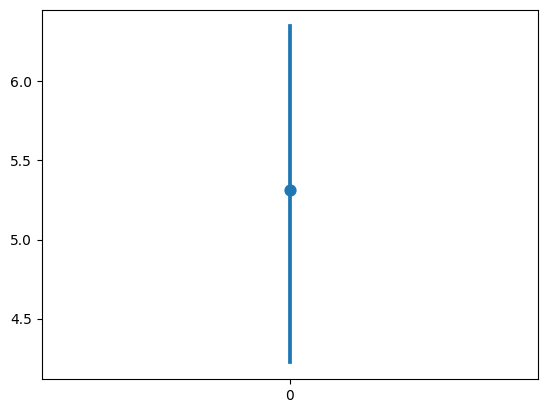

In [116]:
sns.pointplot(data['YearsExperience'])

<Axes: >

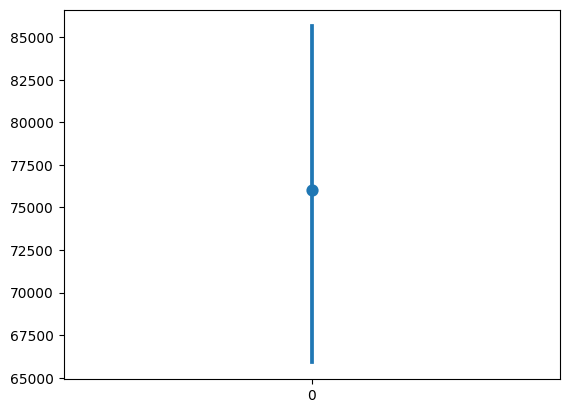

In [117]:
sns.pointplot(data['Salary'])

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: ylabel='Salary'>

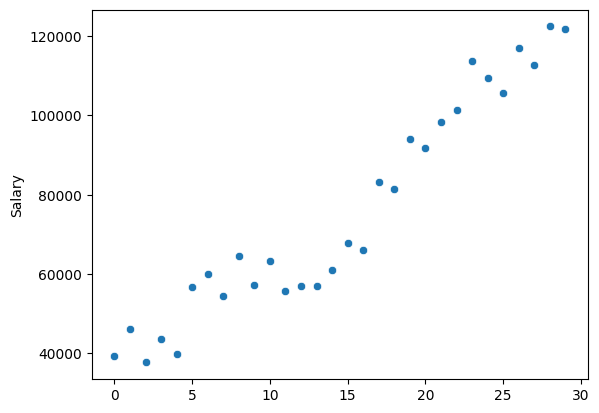

In [123]:
sns.scatterplot(data.Salary)

<Axes: >

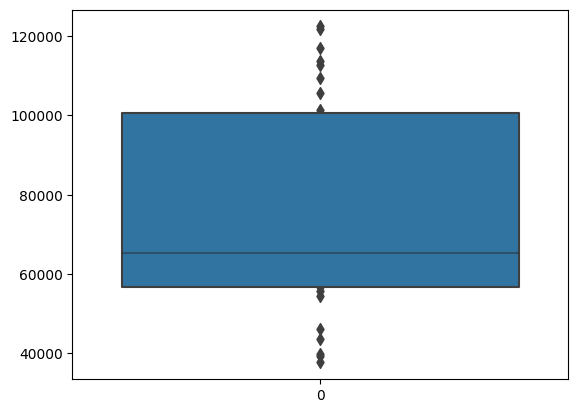

In [ ]:
sns.boxenplot(data.Salary)

<ipython-input-46-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

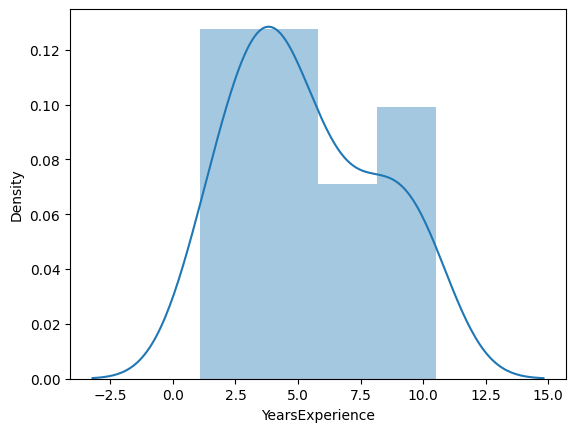

In [ ]:
sns.distplot(data['YearsExperience'])

<Axes: >

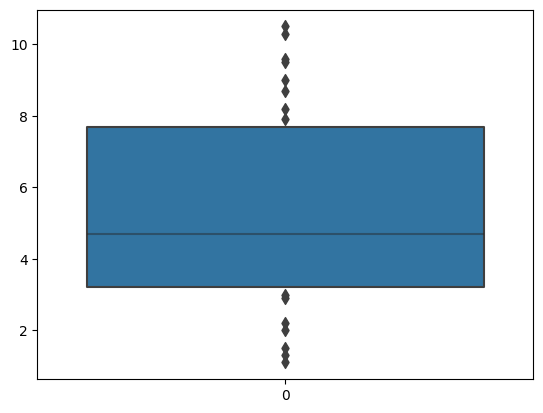

In [ ]:
sns.boxenplot(data['YearsExperience'])

In [ ]:
model = smf.ols("Salary~YearsExperience", data=data).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

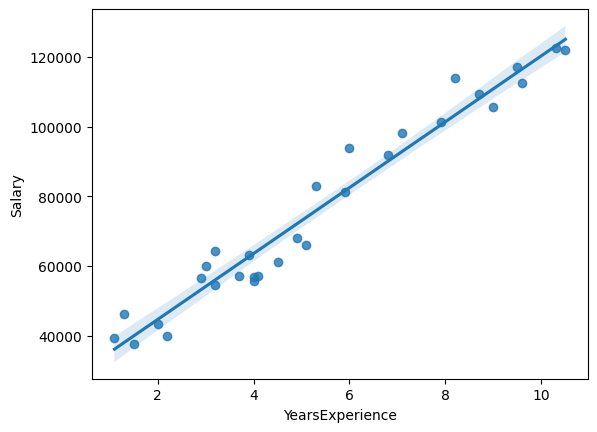

In [ ]:
sns.regplot(x= 'YearsExperience', y= 'Salary', data=data)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

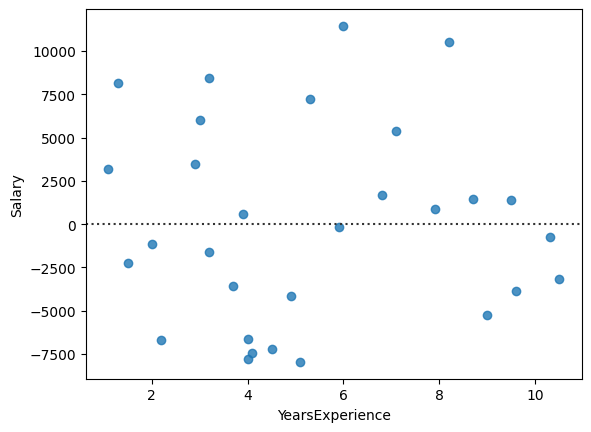

In [ ]:
sns.residplot(x= 'YearsExperience', y= 'Salary', data=data)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        08:12:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
## model prediction##
## prediction  for say 3 years Experience
Salary= (25792.200199) +(9449.962321)*(3)
Salary

54142.087162

In [ ]:
new_data= pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data, columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,8


In [ ]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
dtype: float64

In [ ]:
pred = model.predict(data)

In [ ]:
pred.corr(data.Salary)

0.9782416184887601

In [ ]:

pred.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

Text(0, 0.5, 'Experience in years')

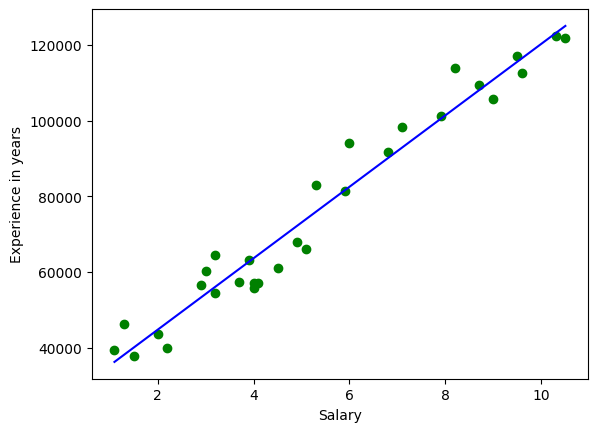

In [ ]:
plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], pred, color = 'blue')
plt.xlabel('Salary')
plt.ylabel('Experience in years')

In [90]:
model1 = smf.ols('Salary~np.log(YearsExperience)', data = data).fit()

In [91]:
model1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [92]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        09:39:45   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
pred1 = model1.predict(data)

In [94]:
pred1.corr(data.Salary)

0.924061081788264

In [95]:
pred1.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

Text(0, 0.5, 'Salary')

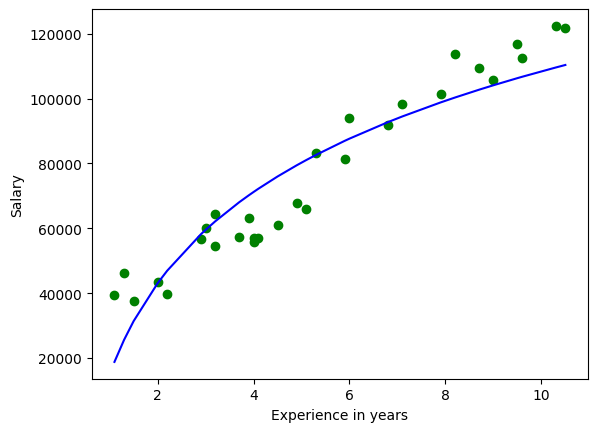

In [96]:


plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], pred1, color = 'blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

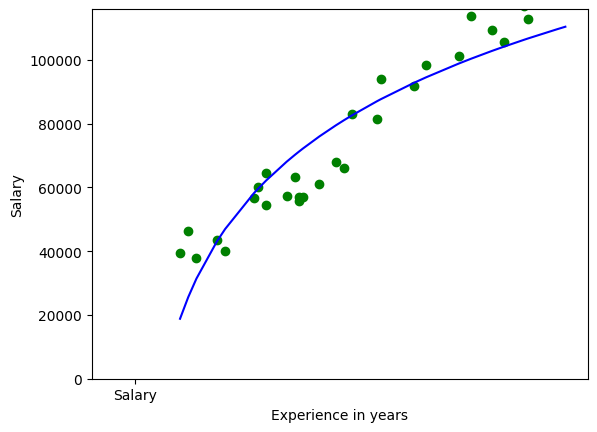

In [105]:
plt.scatter(x = data['YearsExperience'], y = data['Salary'], color = 'green')
plt.plot(data['YearsExperience'], pred1, color = 'blue')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.hist('Salary')